In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Downloads\9961_14084_bundle_archive/train.csv')

In [3]:
df_test = pd.read_csv(r'D:\Downloads\9961_14084_bundle_archive/test.csv')

In [4]:
print(df.shape)
df.head()

(8523, 12)


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [6]:
# drop item_identifier (not important at all)
df.drop(['Item_Identifier'], axis=1, inplace=True)
df_test.drop(['Item_Identifier'], axis=1, inplace=True)

In [7]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [8]:
df.nunique()

Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


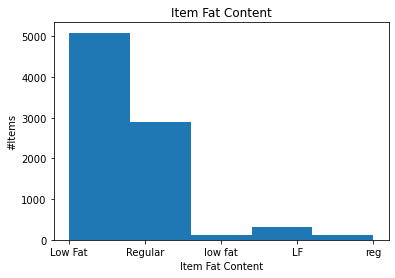

In [10]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['Item_Fat_Content'],bins = 5)
#Labels and Tit
plt.title('Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('#Items')
plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

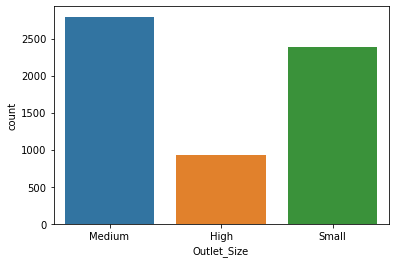

In [11]:
import seaborn as sns
sns.countplot(x='Outlet_Size', data=df)

In [12]:
df = df.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'}})

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

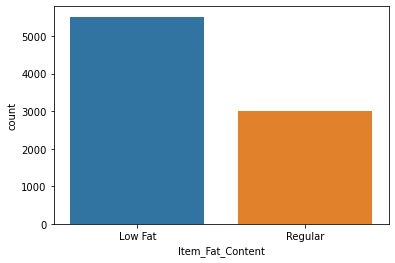

In [13]:

sns.countplot(x='Item_Fat_Content', data=df)

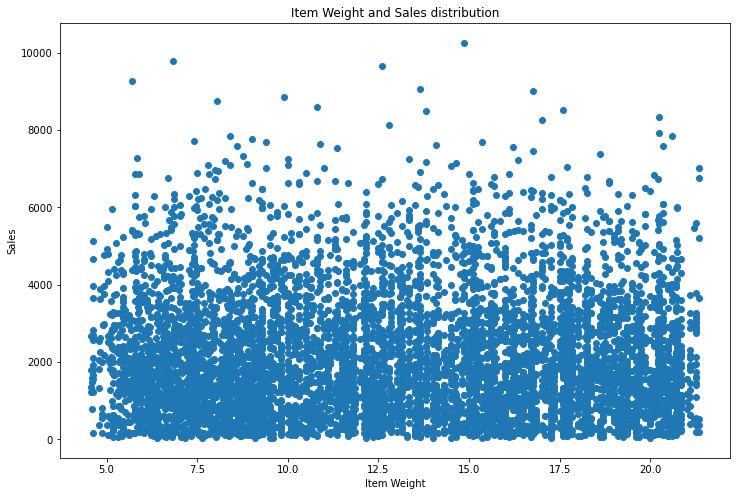

In [14]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
#Variable
ax.scatter(df['Item_Weight'],df['Item_Outlet_Sales'])
#Labels and Tit
plt.title('Item Weight and Sales distribution')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()

In [15]:
import plotly.express as px

fig = px.histogram(df, x='Item_Visibility')

fig.show() #as we can see that we have outliers in this feature



In [16]:
import plotly.express as px

fig = px.histogram(df, x='Item_Type')

fig.show()


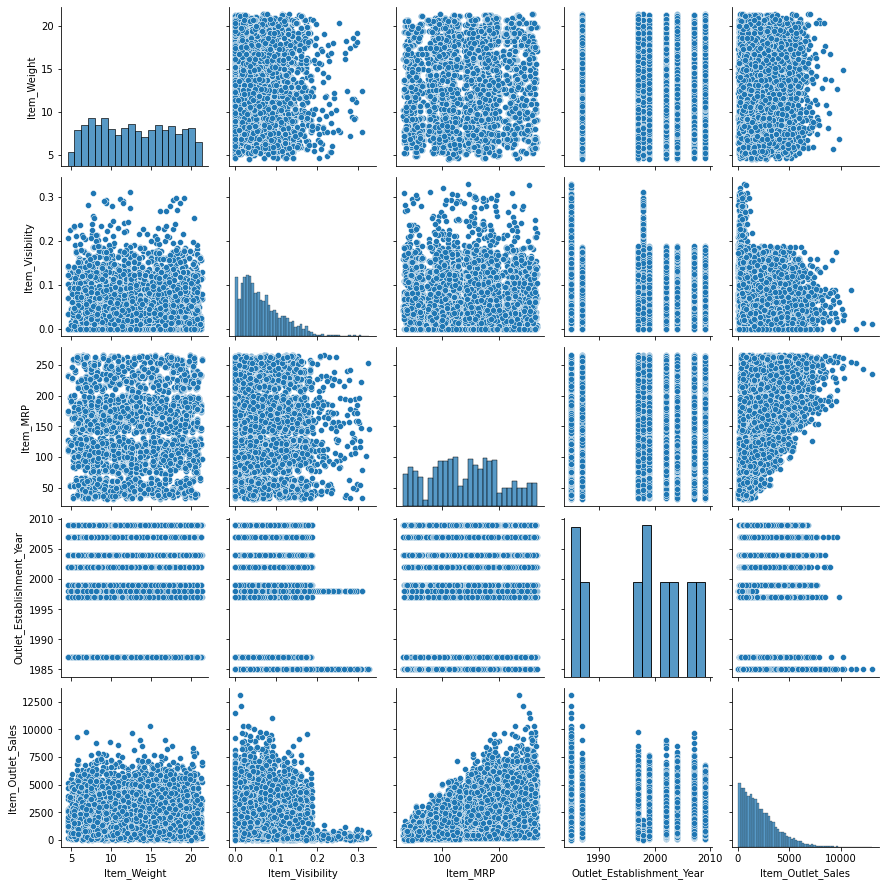

In [17]:
sns.pairplot(df)

### Filling NA 

In [18]:
meanWeight = np.mean(df.Item_Weight)     #Using numpy mean function to calculate the mean value
df.Item_Weight = df.Item_Weight.fillna(meanWeight)
meanWeight = np.mean(df_test.Item_Weight)     #Using numpy mean function to calculate the mean value
df_test.Item_Weight = df_test.Item_Weight.fillna(meanWeight)

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace = True)
print(df.isna().sum())
df_test.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [19]:
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998      Medium   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
3               Tier 3      Grocery Store           732.3800  
4               Tier 3  Supermarket Type1           994.7052

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


# Dealing with outliers

In [21]:
def r_outliers(df, ft):

    q1=df[ft].quantile(0.25)

    q3 = df[ft].quantile(0.75)

    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    ls = df.index[(df[ft]< lower) | (df[ft]> upper)] 

    return ls

def outliers(ft):

    Q1, Q3 =np.nanpercentile(ft , [25,75])

    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    

    return lower, upper


In [22]:
for column in ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']:
    
    if df[column].dtype != 'object':
        ll, ul = outliers(df[column])
        df[column] = np.where(df[column] > ul , ul , df[column])
        df[column] = np.where(df[column] < ll , ll , df[column])
    
    
    if df_test[column].dtype != 'object':
        ll, ul = outliers(df_test[column])
        df_test[column] = np.where(df_test[column] > ul , ul , df_test[column])
        df_test[column] = np.where(df_test[column] < ll , ll , df_test[column])

In [23]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()


def scaleFeatures(df, standardScaler,train=True):
    for col in df.columns:
        if str(df[col].dtype) == 'object':
            continue
        if train:
            df[col] = standardScaler.fit_transform(df[col].values.reshape(-1,1))
        else:
            df[col] = standardScaler.transform(df[col].values.reshape(-1,1))

# scale training data
scaleFeatures(df, X_scaler)
# scale test data
scaleFeatures(df_test, X_scaler, train=False)
print(df.shape)
df.head()

(8523, 11)


Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0    -0.841872          Low Fat        -1.008628                  Dairy   
1    -1.641706          Regular        -0.942473            Soft Drinks   
2     1.098554          Low Fat        -0.994034                   Meat   
3     1.500838          Regular        -1.337208  Fruits and Vegetables   
4    -0.929428          Low Fat        -1.337208              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  1.747454            OUT049                   0.139541      Medium   
1 -1.489023            OUT018                   1.334103      Medium   
2  0.010040            OUT049                   0.139541      Medium   
3  0.660050            OUT010                   0.020085      Medium   
4 -1.399220            OUT013                  -1.293934        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           0.910601  
1               Tier 3  Supermarket Type2          -1.018440  
2               Tier 1  Supermarket Type1          -0.049238  
3               Tier 3      Grocery Store          -0.849103  
4               Tier 3  Supermarket Type1          -0.695373

In [24]:
df_test.head()

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0    -1.266139          Low Fat        -1.278295  Snack Foods -1.215089   
1    -1.273435              reg        -1.278277        Dairy -1.227127   
2    -1.269743          Low Fat        -1.278241       Others -1.136624   
3    -1.274012          Low Fat        -1.278290  Snack Foods -1.187445   
4    -1.270859          Regular        -1.278230        Dairy -1.141033   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                  -0.106827      Medium   
1            OUT017                  -0.102138      Medium   
2            OUT010                  -0.107413      Medium   
3            OUT017                  -0.102138      Medium   
4            OUT027                  -0.115031      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

## Onehot Encoding

In [25]:
def oneHot(df, encode_y=True):
    
    cols = df.columns
    if encode_y:
        ycol = cols[-1]
        y = df[ycol]
        df.drop([ycol], axis=1, inplace=True)
        cols = cols[:-1]
    
    for col in cols:
        if str(df[col].dtype) == 'object':
            # onehot encoding
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
            df.drop([col], axis=1, inplace=True)
    if encode_y:
        df = pd.concat([df, y], axis=1)     
    return df

df = oneHot(df)
df_test = oneHot(df_test, encode_y=False)
print(df.head())
df_test.head()

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    -0.841872        -1.008628  1.747454                   0.139541   
1    -1.641706        -0.942473 -1.489023                   1.334103   
2     1.098554        -0.994034  0.010040                   0.139541   
3     1.500838        -1.337208  0.660050                   0.020085   
4    -0.929428        -1.337208 -1.399220                  -1.293934   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  Item_Type_Baking Goods  \
0                         1                         0                       0   
1                         0                         1                       0   
2                         1                         0                       0   
3                         0                         1                       0   
4                         1                         0                       0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
0            

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    -1.266139        -1.278295 -1.215089                  -0.106827   
1    -1.273435        -1.278277 -1.227127                  -0.102138   
2    -1.269743        -1.278241 -1.136624                  -0.107413   
3    -1.274012        -1.278290 -1.187445                  -0.102138   
4    -1.270859        -1.278230 -1.141033                  -0.115031   

   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                    0                         1                         0   
1                    0                         0                         0   
2                    0                         1                         0   
3                    0                         1                         0   
4                    0                         0                         1   

   Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
0                         0                     0                       0   
1                         0                     1                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   

   ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0  ...                 0                   1                  0   
1  ...                 0                   1                  0   
2  ...                 0                   1                  0   
3  ...                 0                   1                  0   
4  ...                 0                   1                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            0                          0   
2                            1                          1   
3                            0                          0   
4                            1                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              1                              0   
2                              0                              0   
3                              1                              0   
4                              0                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              1  

[5 rows x 45 columns]

In [26]:
df.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    -0.841872        -1.008628  1.747454                   0.139541   
1    -1.641706        -0.942473 -1.489023                   1.334103   
2     1.098554        -0.994034  0.010040                   0.139541   
3     1.500838        -1.337208  0.660050                   0.020085   
4    -0.929428        -1.337208 -1.399220                  -1.293934   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  Item_Type_Baking Goods  \
0                         1                         0                       0   
1                         0                         1                       0   
2                         1                         0                       0   
3                         0                         1                       0   
4                         1                         0                       0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
0                 0                    0                 0  ...   
1                 0                    0                 0  ...   
2                 0                    0                 0  ...   
3                 0                    0                 0  ...   
4                 0                    0                 0  ...   

   Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                   1                  0                            1   
1                   1                  0                            0   
2                   1                  0                            1   
3                   1                  0                            0   
4                   0                  0                            0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                          0                              1   
1                          0                              0   
2                          0                              1   
3                          1                              0   
4                          0                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                              0                              0   
1                              1                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Item_Outlet_Sales  
0           0.910601  
1          -1.018440  
2          -0.049238  
3          -0.849103  
4          -0.695373  

[5 rows x 43 columns]

In [27]:
# split data and take values
from sklearn.model_selection import train_test_split
train_data = df.values

X_train, X_test, Y_train, Y_test = train_test_split(train_data[:,:-1], train_data[:,-1], test_size=0.2) 

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(6818, 42) (6818,) (1705, 42) (1705,)


## Training

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
model = LinearRegression().fit(X_train, Y_train)
# y_pred = model.predict(x_test)

r_sq = model.score(X_train, Y_train)
print('Acuuraccy for Linear Regression on train data : %.3f' %  (100*r_sq)+"%")
r_test = model.score(X_test, Y_test)
print('Acuuraccy for Linear Regression on test data: %.3f' %  (100*r_test)+"%")

Acuuraccy for Linear Regression on train data : 56.647%
Acuuraccy for Linear Regression on test data: 55.033%


In [30]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
print('loaded libs')

modell = make_pipeline(PolynomialFeatures(degree=3), Ridge())
modell.fit(X_train,Y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(modell, X_train, Y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, error_score='raise')
#print(model.named_steps.linearregression.coef_)
Y_pred = modell.predict(X_test)
r_sq = modell.score(X_train, Y_train)

print('Acuuraccy for Polynomial Linear Regression on train data : %.3f' %  (100*r_sq)+"%")
r_test = modell.score(X_test, Y_test)
print('Acuuraccy for Polynomial Linear Regression on test data : %.3f' %  (100*r_test)+"%")

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(-n_scores)
print(f"Mean Square Error : {max(rmse)}") 
print(f"Mean Ansolute Error : {mae}") 

loaded libs
Acuuraccy for Polynomial Linear Regression on train data : 65.815%
Acuuraccy for Polynomial Linear Regression on test data : 53.332%
Mean Square Error : 0.7320424449991026
Mean Ansolute Error : 0.4900461053812319


In [31]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate    
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

ridge = make_pipeline(PolynomialFeatures(degree=2),
                      Ridge(alpha=10))

cv_results = cross_validate(ridge, X_train, Y_train,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True, return_estimator=True)


ridge.fit(X_train, Y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(ridge, X_train, Y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, error_score='raise')
Y_pred = ridge.predict(X_test)

r_sq = ridge.score(X_train, Y_train)
print('Acuuraccy for Ridge on train data :: %.3f' %  (100*r_sq)+"%")

r_test = ridge.score(X_test, Y_test)
print('Acuuraccy for Ridge on test data:: %.3f' %  (100*r_test)+"%")
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(-n_scores)
print(f"Mean Square Error for Ridge : {max(rmse)}") 
print(f"Mean Ansolute Error for Ridge : {mae}") 
# ridge.predict(df_test)

Acuuraccy for Ridge on train data :: 62.042%
Acuuraccy for Ridge on test data:: 59.157%
Mean Square Error for Ridge : 0.700668493553526
Mean Ansolute Error for Ridge : 0.4508872321858309


In [32]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate    
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

las = make_pipeline(PolynomialFeatures(degree=2),Lasso(alpha=0.0001))

cv_results = cross_validate(las, X_train, Y_train,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True, return_estimator=True)


las.fit(X_train, Y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(las, X_train, Y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, error_score='raise')
Y_pred = las.predict(X_test)

r_sq = las.score(X_train, Y_train)
print('Acuuraccy for Lasso on train data :: %.3f' %  (100*r_sq)+"%")

r_test = las.score(X_test, Y_test)
print('Acuuraccy for Lasso on test data:: %.3f' %  (100*r_test)+"%")
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(-n_scores)
print(f"Mean Square Error for Lasso: {max(rmse)}") 
print(f"Mean Ansolute Error for Lasso: {mae}") 


Acuuraccy for Lasso on train data :: 62.067%
Acuuraccy for Lasso on test data:: 59.295%
Mean Square Error for Lasso: 0.7001162425552339
Mean Ansolute Error for Lasso: 0.4499982443780155


In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, max_depth = 5,random_state = 0)
regressor.fit(X_train,Y_train)


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(regressor, X_train, Y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, error_score='raise')

Y_pred = regressor.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(-n_scores)
print(f"MSE for Random Forest with increased number of extimators : {max(rmse)}") 


MSE for Random Forest with increased number of extimators : 0.692134694794879


In [34]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

models = XGBRegressor()
models.fit(X_train, Y_train)

# make predictions for test data
Y_pred = models.predict(X_test)
predictions = [round(value) for value in Y_pred]


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(models, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

Y_pred = models.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(-n_scores)
print(f"MSE for XGB  :  {max(rmse)}") 


MSE for XGB  :  20.684276685175043


## -------------------------------------------------------------------------------------------
# End Cleaning
## -------------------------------------------------------------------------------------------